<a href="https://colab.research.google.com/github/CamiSilvae/PDI/blob/main/Laboratorio/Pr%C3%A1cticas/PDI_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica N°04
**Procesamiento geométrico y procesamiento de histograma**


---

EQUIPO 8

*   2109522 - Camila Andrea Silva Espinoza
*   2049215 - Norma Cecilia Cázares del Ángel
*   2109208 - Alejandro de Jesús Guerrero Maynes
*   2109690 - Mariana Seany Zamarripa Puente


# Parte 1

**Procesamiento Geométrico**

---



**1. Carga de un archivo**

La siguiente función se encarga de abrir una ventana para subir una imagen y la variable "uploaded" se encarga de guardarlo con el nombre del archivo

In [1]:
from google.colab import files

uploaded = files.upload ()

Saving RMrodilla.jpg to RMrodilla.jpg


**2. Instalación e importación de librebrías**

Instala las librerias necesarias y las importa; "Kmeans" se utilizará para lograr agrupar los colores

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**3. Cargar imagen médica**

Convierte la imagen a escala de grises para lograr simplificar las operaciones geompetricas y del histograma

In [3]:
def cargar_imagen_medica(uploaded_dict, escala_grises=True):
    nombre = next(iter(uploaded_dict.keys()))
    img = cv2.imread(nombre)
    if img is None:
        raise ValueError("No se pudo cargar la imagen. Verifica el formato.")
    if escala_grises:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

**4. Procesamiento geométrico**

En esta parte del código se encuentras los 3 ejercicios de la parte 1:

1.  **TRASLACIÓN**: Desplaza la imagen "X" y "Y"
2.   **ROTACIÓN**: Utiliza una función para girar 45° sobre el centro
3.  **ESCALADO**: Utiliza otra función con factores 1.5 y 0.5 para grandar o reducir





In [4]:
def aplicar_traslacion(img, dx, dy):
    filas, columnas = img.shape[:2]
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    trasladada = cv2.warpAffine(img, M, (columnas, filas))
    return trasladada

def aplicar_rotacion(img, angulo):
    filas, columnas = img.shape[:2]
    centro = (columnas // 2, filas // 2)
    M = cv2.getRotationMatrix2D(centro, angulo, 1)
    rotada = cv2.warpAffine(img, M, (columnas, filas))
    return rotada

def aplicar_escalado(img, factor_x, factor_y):
    escalada = cv2.resize(img, None, fx=factor_x, fy=factor_y, interpolation=cv2.INTER_LINEAR)
    return escalada

**5. Ecualización del histograma**

En esta parte se mejora el contraste y se calcula los histogramas antes y después para mostrar las gráficas que permiten observar cómo el histograma se distribuye más uniformemente tras la ecualización

IMAGEN MÉDICA.


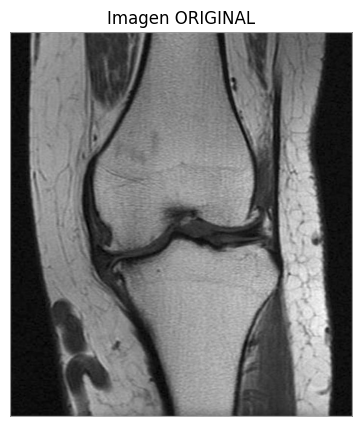

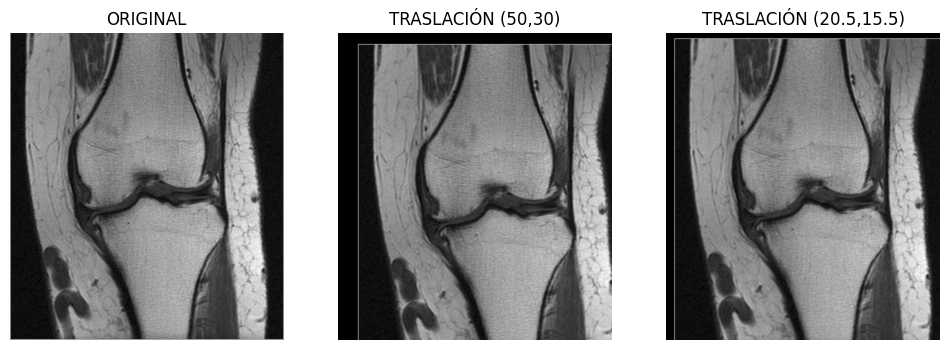

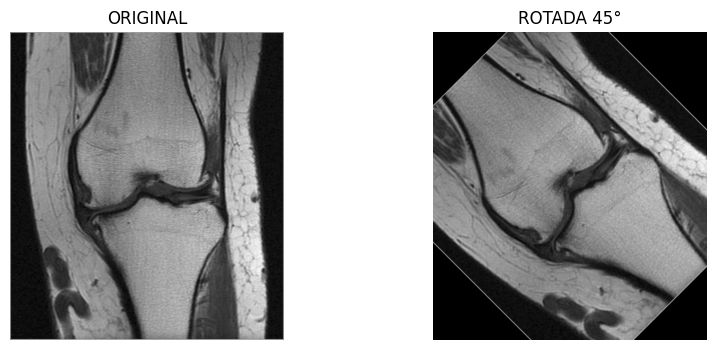

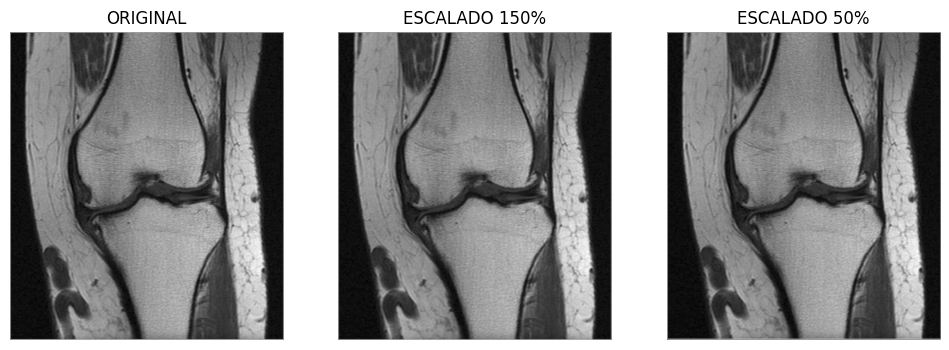

In [8]:
imagen = cargar_imagen_medica(uploaded, escala_grises=True)
print("IMAGEN MÉDICA.")

plt.figure(figsize=(5,5))
plt.imshow(imagen, cmap='gray')
plt.title("Imagen ORIGINAL")
plt.axis('off')
plt.show()

traslacion1 = aplicar_traslacion(imagen, 50, 30)
traslacion2 = aplicar_traslacion(imagen, 20.5, 15.5)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(imagen, cmap='gray'); plt.title("ORIGINAL"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(traslacion1, cmap='gray'); plt.title("TRASLACIÓN (50,30)"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(traslacion2, cmap='gray'); plt.title("TRASLACIÓN (20.5,15.5)"); plt.axis('off')
plt.show()

rotada = aplicar_rotacion(imagen, 45)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(imagen, cmap='gray'); plt.title("ORIGINAL"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(rotada, cmap='gray'); plt.title("ROTADA 45°"); plt.axis('off')
plt.show()

escala_mayor = aplicar_escalado(imagen, 1.5, 1.5)
escala_menor = aplicar_escalado(imagen, 0.5, 0.5)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(imagen, cmap='gray'); plt.title("ORIGINAL"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(escala_mayor, cmap='gray'); plt.title("ESCALADO 150%"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(escala_menor, cmap='gray'); plt.title("ESCALADO 50%"); plt.axis('off')
plt.show()

# Parte 2

**Histograma**

---



**6. Procesamiento de histograma**


Esta parte 2 busca mejorar el contraste de una imagen médica, mediante una de las técnicas más utilizadas "Ecualización de Histograma"

In [6]:
def ecualizar_histograma(img):
    ecualizada = cv2.equalizeHist(img)
    hist_original = cv2.calcHist([img], [0], None, [256], [0,256])
    hist_ecualizada = cv2.calcHist([ecualizada], [0], None, [256], [0,256])
    return ecualizada, hist_original, hist_ecualizada

**7. Visualización con Matplotlib**

En esta última parte se muestra la imagen original y la mejorada para después arrojar los histogramas de cada una "Original" y el "Ecualizado"

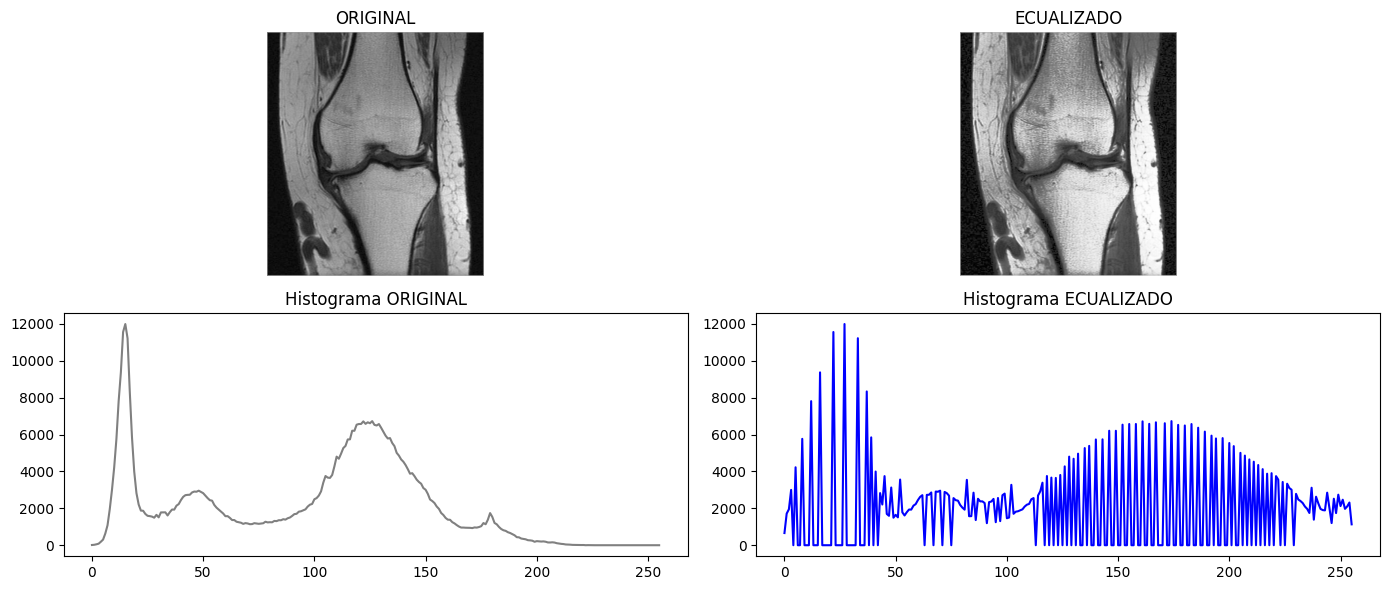

FIN.


In [9]:
imagen2 = imagen
ecualizada, hist1, hist2 = ecualizar_histograma(imagen2)

plt.figure(figsize=(14,6))
plt.subplot(2,2,1); plt.imshow(imagen2, cmap='gray'); plt.title("ORIGINAL"); plt.axis('off')
plt.subplot(2,2,2); plt.imshow(ecualizada, cmap='gray'); plt.title("ECUALIZADO"); plt.axis('off')
plt.subplot(2,2,3); plt.plot(hist1, color='gray'); plt.title("Histograma ORIGINAL")
plt.subplot(2,2,4); plt.plot(hist2, color='blue'); plt.title("Histograma ECUALIZADO")
plt.tight_layout()
plt.show()

print("FIN.")